In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [3]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use cv.calcHist() to generate the histogram

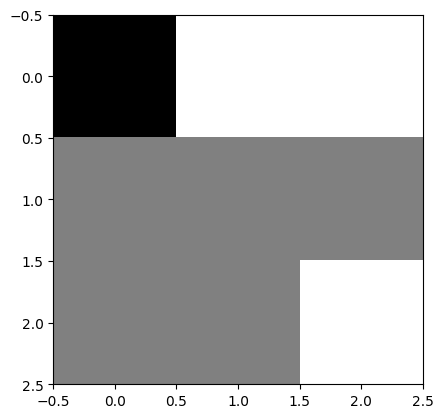

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [4]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

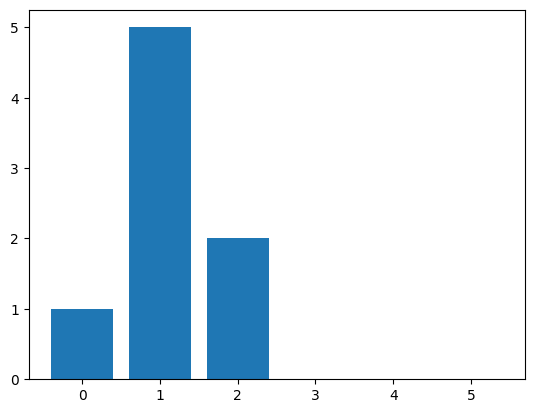

In [5]:
plt.bar ([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

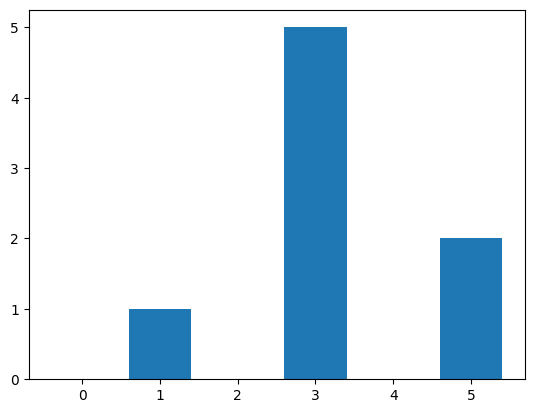

In [6]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

...................................

Gray Scale Histograms

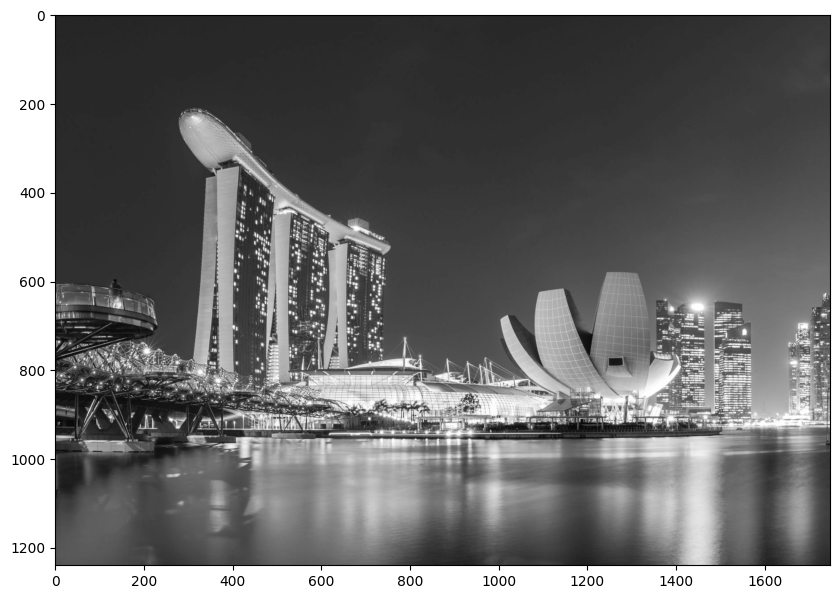

In [7]:
img = cv2.imread("Singapore.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap="gray")
plt.show()

In [8]:
hist = cv2.calcHist([img],[0], None,[256],[0,256])

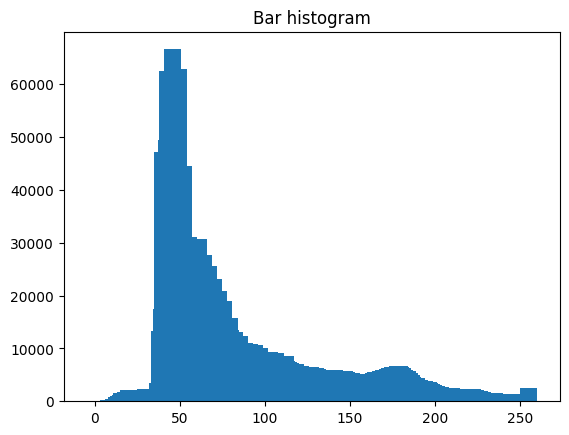

In [9]:
intensity_value = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_value, hist[:,0],width=10)
plt.title("Bar histogram")
plt.show()

In [10]:
PMF = hist / (img.shape[0]*img.shape[1])

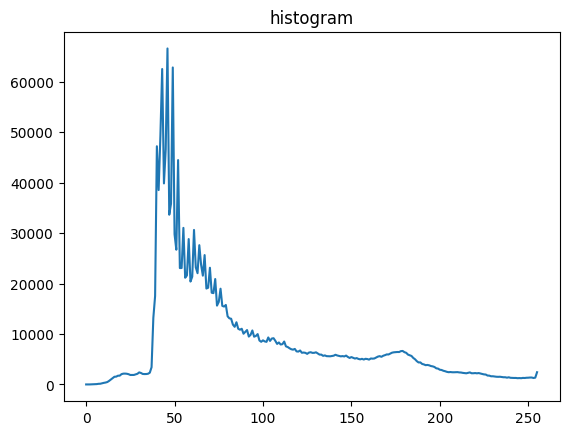

In [11]:
plt.plot(intensity_value,hist)
plt.title("histogram")
plt.show()

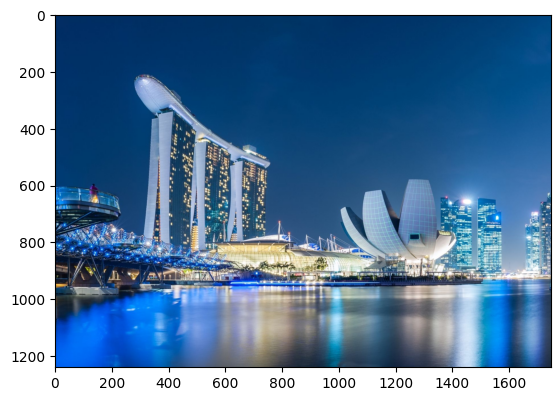

In [13]:
img = cv2.imread("Singapore.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In the loop, the value for i specifies what color channel calcHist is going to calculate the histogram for.

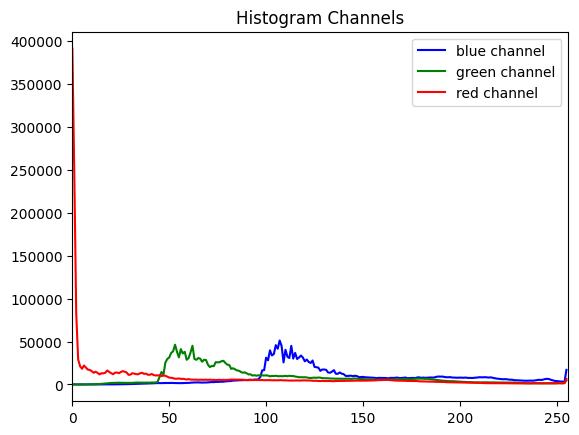

In [14]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(intensity_value,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

#  Intensity Transformations

It's helpful to think of an image as a function  𝑓(𝑥,𝑦)
  instead of an array at this point, where x is the row index and y is the column index. You can apply a transformation  𝑇
  to the image and get a new image:
𝑔(𝑥,𝑦)=𝑇(𝑓(𝑥,𝑦))
 
An Intensity Transformation depends on only one single point  (𝑥,𝑦)
 . For example, you can apply a linear transform  𝑔(𝑥,𝑦)=2𝑓(𝑥,𝑦)+1
 ; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if  𝑟
  is the gray level intensity, similar to the histogram values. The new output s is given by:

𝑠=𝑇(𝑟)

Consider an image with  𝐿
  intensity values ranging from  [0,𝐿−1]
 . We can reverse the intensity levels by applying the following:
𝑔(𝑥,𝑦)=𝐿−1−𝑓(𝑥,𝑦)
 
Using the intensity transformation function notation
𝑠=𝐿−1−𝑟
 
This is called the image negative. For  𝐿=256
  the formulas simplifys to:
𝑔(𝑥,𝑦)=255−𝑓(𝑥,𝑦)and𝑠=255−𝑟

We can perform intensity transformation on the toy image where  𝐿=3
 :

In [15]:
neg_toy_image = -1*toy_image + 255
print("toy image\n", neg_toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


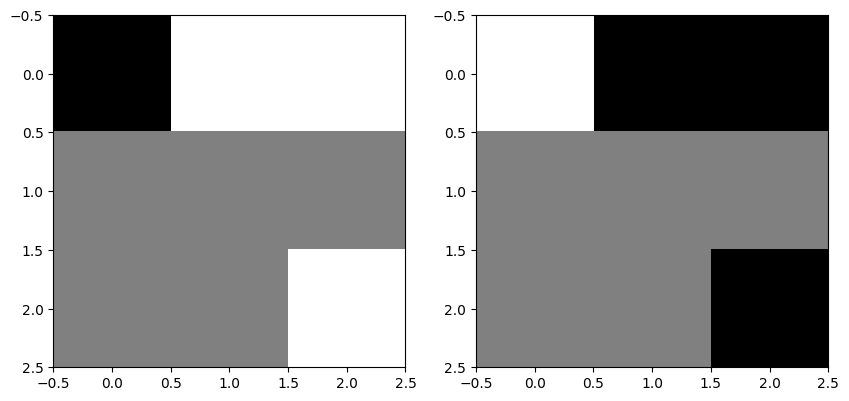

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [16]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(toy_image, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:", toy_image)

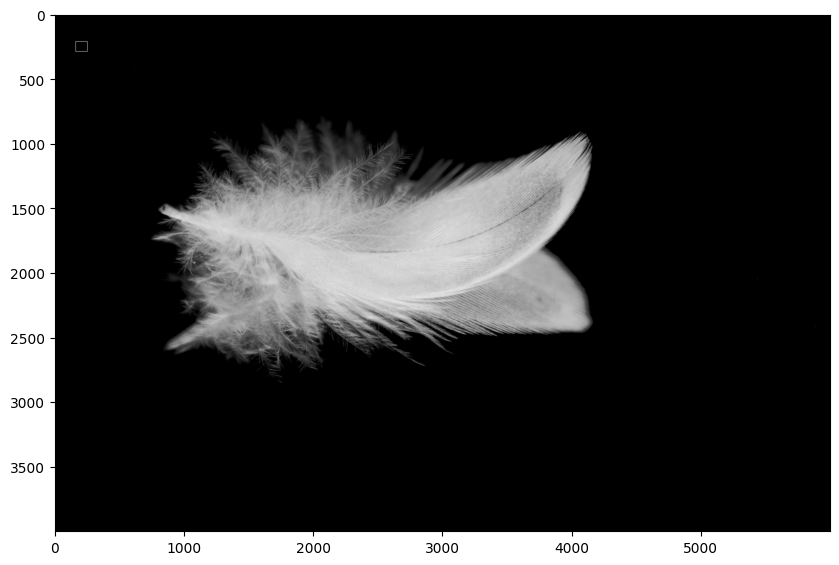

In [17]:
image = cv2.imread("f1.jpg", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

In [18]:
img_neg = -1 * image + 255

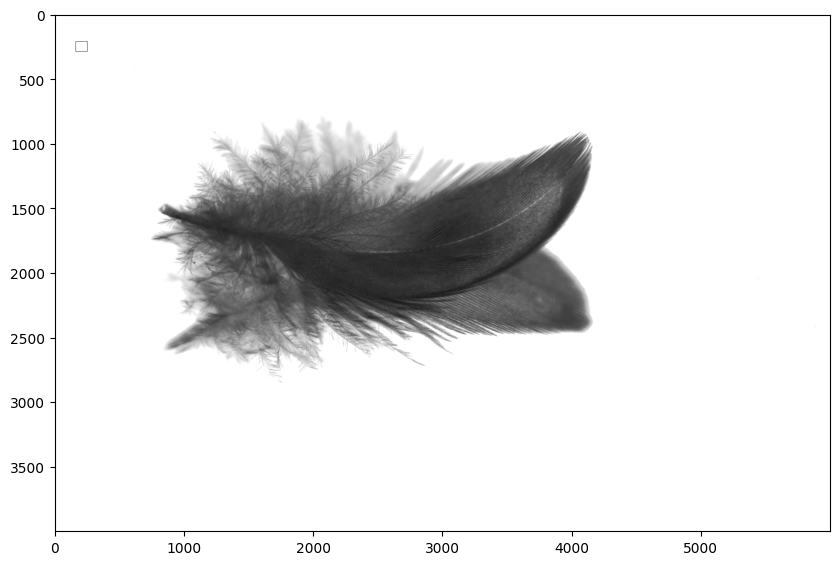

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

#  Brightness and contrast adjustments

We can use multiplication by  𝛼
  for contrast control and addition by  𝛽
  to improve brightness control. This applies the Intensity Transformation as well. The image is  𝑓(𝑥,𝑦)
  and the transformed image is  𝑔(𝑥,𝑦)
 , where  𝑔(𝑥,𝑦)=𝛼𝑓(𝑥,𝑦)+𝛽
 .
    Rather than implementing via array operations, we use the function # convertScaleAbs. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between  [0,255]
 . For brightness control, we can set  𝛼
  to 1 and  𝛽
  to 100: Remember the Good Hill image, it’s dark and hazy so let's see if we can improve it.

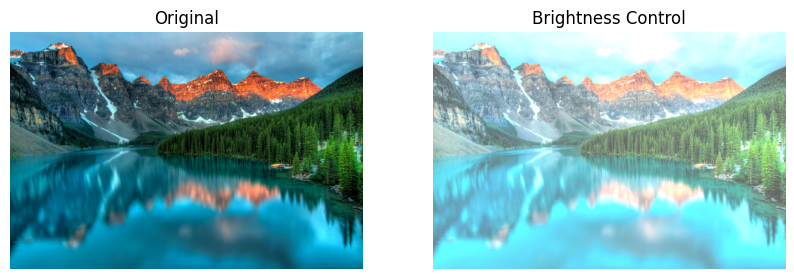

In [31]:
img = cv2.imread("p1.jpg")

# Apply brightness control (replace this with your actual brightness control method)
alpha = 1  # Simple contrast control
beta = 100  # Simple brightness control
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Call the plot_image function
plot_image(img, new_image, title_1="Original", title_2="Brightness Control")


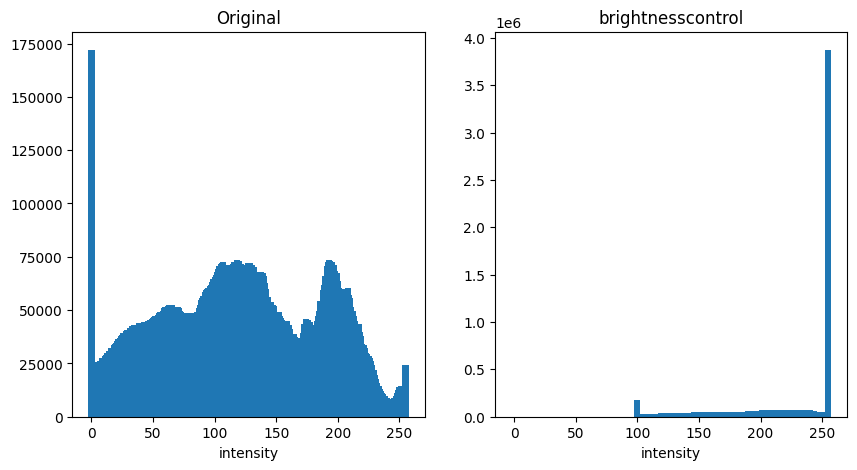

In [32]:
plt.figure(figsize=(10,5))
plot_hist(img, new_image,"Original", "brightnesscontrol")

In [33]:
#Increase the contrast by increasing  𝛼
plt.figure(figsize=(10,5))
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control   # Simple brightness control
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

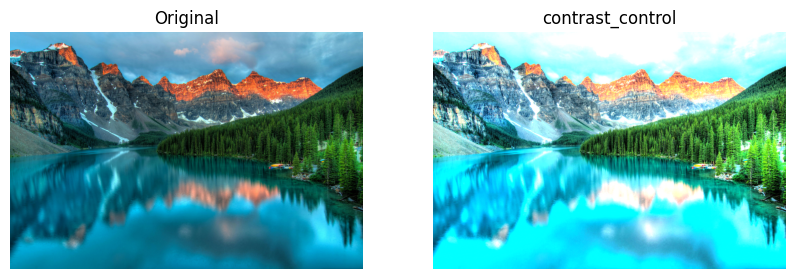

In [34]:
plot_image(img, new_image, "Original","contrast_control")

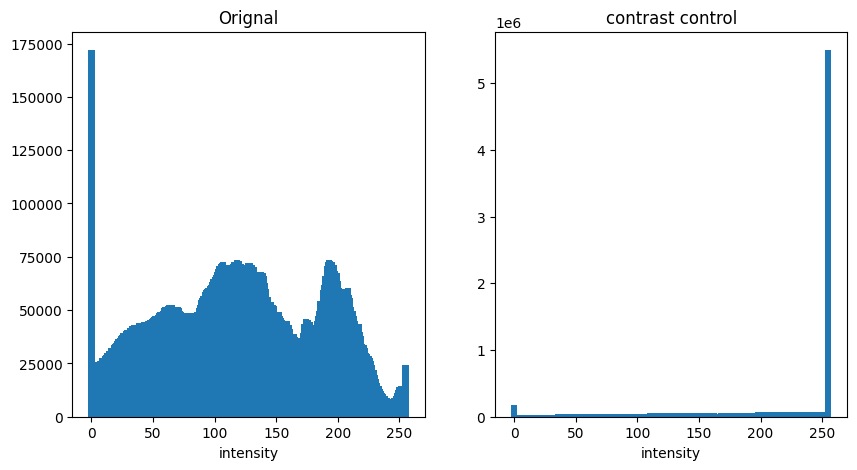

In [35]:
plt.figure(figsize=(10,5))
plot_hist(img, new_image,"Orignal","contrast control")

In [36]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

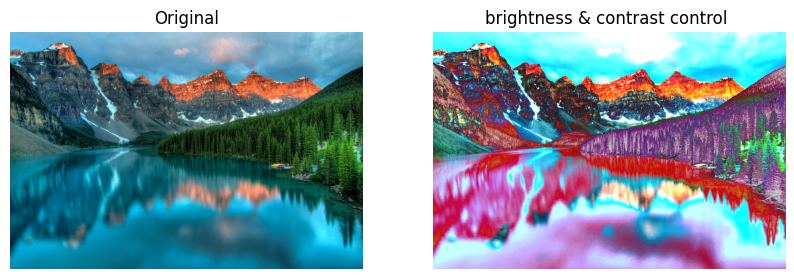

In [37]:
plot_image(img, new_image, "Original", "brightness & contrast control ")

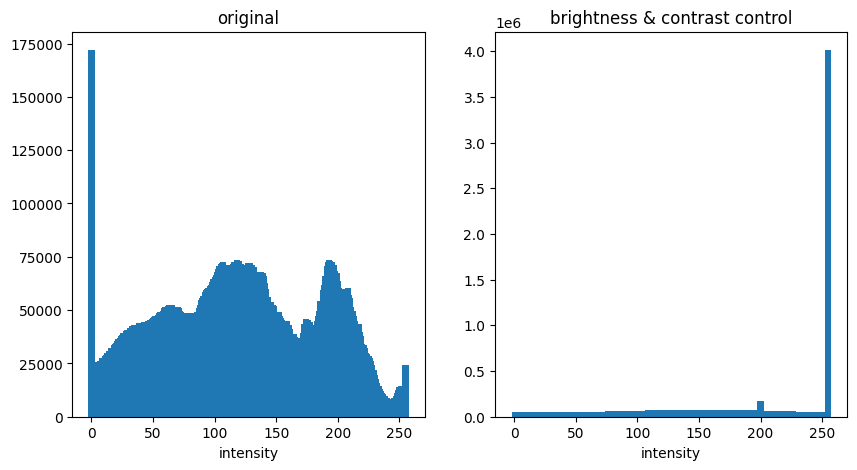

In [38]:
plt.figure(figsize=(10,5))
plot_hist(img, new_image, "original","brightness & contrast control")